<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Predict_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict the importance**

## import tpot(Tree based Pipeline Optimization Tool)

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 163kB 23.0MB/s 
     |████████████████████████████████| 157.5MB 88kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=a3759a2005e03b9e7d049317242e735ef2e28bcbdcf0a9a0cfaa9e1ad0907d26
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/train.csv",parse_dates=['judgementdate','kpdate'])
test = pd.read_csv("/content/test.csv",parse_dates=['judgementdate','kpdate'])
sub = pd.read_csv("/content/sample_submission.csv")

In [ ]:
train['importance'].dtype

dtype('int64')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Columns: 328 entries, appno to importance
dtypes: bool(1), datetime64[ns](2), float64(1), int64(276), object(48)
memory usage: 22.2+ MB


In [ ]:
train.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,...,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-92699,2009-05-28,2009-05-28,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-184490,2018-10-07,2018-10-07,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-113810,2012-10-18,2012-10-18,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-141929,2014-03-25,2014-03-25,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-94585,2009-01-10,2009-01-10,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [ ]:
train['month'] = train['kpdate'].dt.month_name()
train['year'] = train['kpdate'].dt.year
train['week_day'] = train['kpdate'].dt.day_name()
#
test['month'] = test['kpdate'].dt.month_name()
test['year'] = test['kpdate'].dt.year
test['week_day'] = test['kpdate'].dt.day_name()

In [ ]:
train['year'] = train['year'].astype('str')
train['month'] = train['month'].astype('str')
train['week_day'] = train['week_day'].astype('str')


In [ ]:
test['year'] = test['year'].astype('str')
test['month'] = test['month'].astype('str')
test['week_day'] = test['week_day'].astype('str')

In [ ]:
ccl = [col for col in train.columns if col.startswith('ccl_article')]

In [ ]:
ccl

['ccl_article=1',
 'ccl_article=10',
 'ccl_article=11',
 'ccl_article=12',
 'ccl_article=13',
 'ccl_article=14',
 'ccl_article=17',
 'ccl_article=18',
 'ccl_article=2',
 'ccl_article=25',
 'ccl_article=3',
 'ccl_article=34',
 'ccl_article=38',
 'ccl_article=4',
 'ccl_article=46',
 'ccl_article=5',
 'ccl_article=6',
 'ccl_article=7',
 'ccl_article=8',
 'ccl_article=9',
 'ccl_article=p1',
 'ccl_article=p12',
 'ccl_article=p4',
 'ccl_article=p6',
 'ccl_article=p7']

In [ ]:
for col in ccl:
  train[col] = train[col].astype('str')


In [ ]:
train.isnull().sum()[train.isnull().sum() > 0 ]/len(train)

decisiondate        0.923857
introductiondate    0.923857
issue.0             0.746790
issue.1             0.866524
issue.10            0.997635
issue.11            0.998085
issue.12            0.998310
issue.13            0.998648
issue.14            0.998874
issue.15            0.999212
issue.16            0.999549
issue.17            0.999662
issue.18            0.999775
issue.19            0.999775
issue.2             0.928024
issue.20            0.999775
issue.21            0.999775
issue.22            0.999775
issue.23            0.999775
issue.24            0.999887
issue.25            0.999887
issue.26            0.999887
issue.3             0.958324
issue.4             0.976346
issue.5             0.986371
issue.6             0.991327
issue.7             0.994030
issue.8             0.996508
issue.9             0.997184
parties.1           0.000451
parties.2           0.999887
respondent.1        0.995832
respondent.2        0.999887
respondent.3        0.999887
respondent.4  

In [ ]:
drop_cols = train.isnull().sum()[train.isnull().sum() > 0 ].index.tolist()

In [ ]:
train.importance.dtype

dtype('int64')

In [ ]:
train_new = train.drop(drop_cols,axis=1)
test_new = test.drop(drop_cols,axis=1)

In [ ]:
train_new.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,...,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance,month,year,week_day
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,001-92699,2009-05-28,2009-05-28,ENG,4,First Section,Court,KOKOSHKINA,685.417419,RUS,38,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,May,2009,Thursday
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,001-184490,2018-10-07,2018-10-07,ENG,26,Second Section Committee,Court,ÖZCAN,2641.901855,TUR,47,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,October,2018,Sunday
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,001-113810,2012-10-18,2012-10-18,ENG,23,Fith Section,Court,DANIJEL PEČNIK,942.213440,SVN,43,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,October,2012,Thursday
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,001-141929,2014-03-25,2014-03-25,ENG,5,Second Section,Court,PALANCI,1121.770142,CHE,46,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4,March,2014,Tuesday
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,001-94585,2009-01-10,2009-01-10,ENG,4,First Section,Court,AMANAT ILYASOVA AND OTHERS,704.821594,RUS,38,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,January,2009,Saturday


In [ ]:
train_new.importance.dtype

dtype('int64')

In [ ]:
cat_cols = [col for col in train_new.columns if train_new[col].dtypes == 'O']

In [ ]:
num_cols = [col for col in train_new.columns if train_new[col].dtypes != 'O']

In [ ]:
train_new.shape

(8878, 296)

In [ ]:
cat_cols

['appno',
 'application',
 'country.alpha2',
 'country.name',
 'docname',
 'doctypebranch',
 'ecli',
 'itemid',
 'languageisocode',
 'originatingbody_name',
 'originatingbody_type',
 'parties.0',
 'respondent.0',
 'ccl_article=1',
 'ccl_article=10',
 'ccl_article=11',
 'ccl_article=12',
 'ccl_article=13',
 'ccl_article=14',
 'ccl_article=17',
 'ccl_article=18',
 'ccl_article=2',
 'ccl_article=25',
 'ccl_article=3',
 'ccl_article=34',
 'ccl_article=38',
 'ccl_article=4',
 'ccl_article=46',
 'ccl_article=5',
 'ccl_article=6',
 'ccl_article=7',
 'ccl_article=8',
 'ccl_article=9',
 'ccl_article=p1',
 'ccl_article=p12',
 'ccl_article=p4',
 'ccl_article=p6',
 'ccl_article=p7',
 'month',
 'year',
 'week_day']

In [ ]:
cat_cols_req = []
for col in cat_cols:
  print(f'{col} : {train_new[col].nunique()/len(train_new[col])}')
  if train_new[col].nunique()/len(train_new[col]) <= 0.40 and train_new[col].nunique() !=1:
    cat_cols_req.append(col)




appno : 0.9911015994593377
application : 0.00011263798152737103
country.alpha2 : 0.0051813471502590676
country.name : 0.0051813471502590676
docname : 0.9779229556206352
doctypebranch : 0.00033791394458211306
ecli : 1.0
itemid : 1.0
languageisocode : 0.00011263798152737103
originatingbody_name : 0.0014642937598558234
originatingbody_type : 0.00011263798152737103
parties.0 : 0.9417661635503491
respondent.0 : 0.0051813471502590676
ccl_article=1 : 0.00033791394458211306
ccl_article=10 : 0.00033791394458211306
ccl_article=11 : 0.00033791394458211306
ccl_article=12 : 0.00033791394458211306
ccl_article=13 : 0.00033791394458211306
ccl_article=14 : 0.00033791394458211306
ccl_article=17 : 0.00022527596305474206
ccl_article=18 : 0.00022527596305474206
ccl_article=2 : 0.00033791394458211306
ccl_article=25 : 0.00033791394458211306
ccl_article=3 : 0.00033791394458211306
ccl_article=34 : 0.00033791394458211306
ccl_article=38 : 0.00033791394458211306
ccl_article=4 : 0.00033791394458211306
ccl_article=

In [ ]:
for col in cat_cols:
  
  print(f'{col} : {test_new[col].nunique()/len(test_new[col])}')

appno : 1.0
application : 0.0002100840336134454
country.alpha2 : 0.009663865546218488
country.name : 0.009663865546218488
docname : 0.9930672268907563
doctypebranch : 0.0006302521008403362
ecli : 1.0
itemid : 1.0
languageisocode : 0.0002100840336134454
originatingbody_name : 0.0027310924369747898
originatingbody_type : 0.0002100840336134454
parties.0 : 0.9714285714285714
respondent.0 : 0.009663865546218488
ccl_article=1 : 0.0006302521008403362
ccl_article=10 : 0.0006302521008403362
ccl_article=11 : 0.0006302521008403362
ccl_article=12 : 0.0004201680672268908
ccl_article=13 : 0.0006302521008403362
ccl_article=14 : 0.0006302521008403362
ccl_article=17 : 0.0002100840336134454
ccl_article=18 : 0.0004201680672268908
ccl_article=2 : 0.0006302521008403362
ccl_article=25 : 0.0004201680672268908
ccl_article=3 : 0.0006302521008403362
ccl_article=34 : 0.0006302521008403362
ccl_article=38 : 0.0006302521008403362
ccl_article=4 : 0.0006302521008403362
ccl_article=46 : 0.0002100840336134454
ccl_artic

In [ ]:
train_new.kpdate.min(),train_new.kpdate.max()

(Timestamp('1968-06-27 00:00:00'), Timestamp('2020-12-05 00:00:00'))

In [ ]:
test_new.kpdate.min(),test_new.kpdate.max()

(Timestamp('1961-01-07 00:00:00'), Timestamp('2020-12-05 00:00:00'))

In [ ]:
train_new[['kpdate','judgementdate']].head()

,kpdate,judgementdate
0,2009-05-28,2009-05-28
1,2018-10-07,2018-10-07
2,2012-10-18,2012-10-18
3,2014-03-25,2014-03-25
4,2009-01-10,2009-01-10


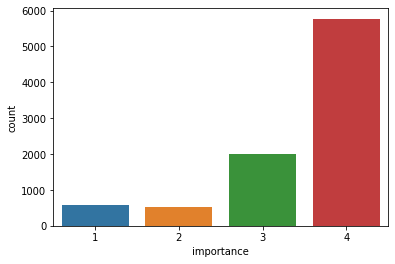

In [ ]:
sns.countplot(train_new['importance'])

In [ ]:
cat_cols_req 

['country.alpha2',
 'country.name',
 'doctypebranch',
 'originatingbody_name',
 'respondent.0',
 'ccl_article=1',
 'ccl_article=10',
 'ccl_article=11',
 'ccl_article=12',
 'ccl_article=13',
 'ccl_article=14',
 'ccl_article=17',
 'ccl_article=18',
 'ccl_article=2',
 'ccl_article=25',
 'ccl_article=3',
 'ccl_article=34',
 'ccl_article=38',
 'ccl_article=4',
 'ccl_article=46',
 'ccl_article=5',
 'ccl_article=6',
 'ccl_article=7',
 'ccl_article=8',
 'ccl_article=9',
 'ccl_article=p1',
 'ccl_article=p12',
 'ccl_article=p4',
 'ccl_article=p6',
 'ccl_article=p7',
 'month',
 'year',
 'week_day']

In [ ]:
num_cols

['judgementdate',
 'kpdate',
 'originatingbody',
 'rank',
 'respondentOrderEng',
 'separateopinion',
 'sharepointid',
 'typedescription',
 'article=3',
 'article=6',
 'article=P1',
 'article=5',
 'article=8',
 'article=13',
 'article=10',
 'article=2',
 'article=34',
 'article=41',
 'article=38',
 'article=35',
 'article=4',
 'article=29',
 'article=14',
 'article=P12',
 'article=9',
 'article=1',
 'article=11',
 'article=46',
 'article=P4',
 'article=17',
 'article=18',
 'article=7',
 'article=',
 'article=37',
 'article=P7',
 'article=57',
 'article=26',
 'article=27',
 'article=36',
 'article=30',
 'article=12',
 'article=56',
 'article=39',
 'article=15',
 'article=25',
 'article=P6',
 'article=19',
 'article=32',
 'article=33',
 'article=53',
 'article=28',
 'article=43',
 'article=52',
 'article=P13',
 'article=16',
 'documentcollectionid=CASELAW',
 'documentcollectionid=JUDGMENTS',
 'documentcollectionid=CHAMBER',
 'documentcollectionid=ENG',
 'documentcollectionid=COMMITTEE',
 

In [ ]:
new_cols = cat_cols_req + num_cols
train_new = train[new_cols]


In [ ]:
for cols in cat_cols_req:
  train_new[cols] = train_new[cols].astype(str)
  test_new[cols] = test_new[cols].astype(str)

In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Columns: 288 entries, country.alpha2 to importance
dtypes: bool(1), datetime64[ns](2), float64(1), int64(251), object(33)
memory usage: 19.4+ MB


In [ ]:
train_new.drop(['kpdate','judgementdate'],axis=1,inplace=True)
test_new.drop(['kpdate','judgementdate'],axis=1,inplace=True)

In [ ]:
train_new.importance.dtype

dtype('int64')

## Use when using catboost model

In [ ]:
cat_features_index = np.where(train_new.dtypes == object)[0]

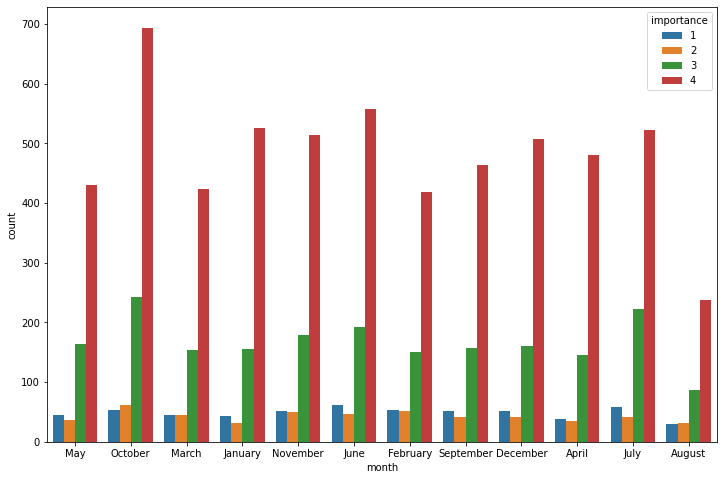

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='month',data=train_new,hue='importance')

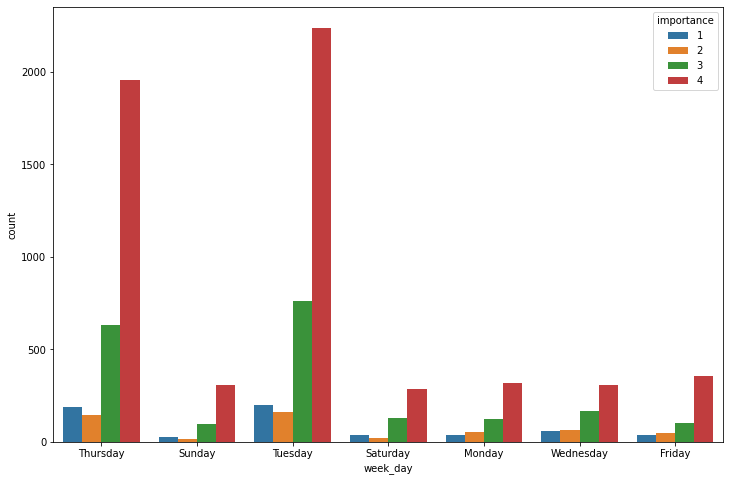

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='week_day',data=train_new,hue='importance')

In [ ]:
def check_mult_col(df,target,threshold =0.75):
  corr =  train.drop(target,axis=1).corr().abs()
  up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  #print(up_tri)
  #find all features having a correlation > threshold
  correlated_features = [col for col in up_tri.columns if any(up_tri[col] > threshold)]
  #print(f"The correlated features which can be dropped are :{correlated_features}")
  return correlated_features

In [ ]:
cols_to_drop = check_mult_col(train_new,'importance',threshold =0.90)

In [ ]:
len(cols_to_drop)

62

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 78kB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

In [ ]:
train_new.isnull().sum()[train_new.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
X = train_new.drop('importance',axis=1)
Y = train_new['importance']

In [ ]:
train.shape

(8878, 331)

In [ ]:
X.shape

(8878, 285)

In [ ]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0007,0.005, 0.01],
    'n_estimators': [6000,6500,7000,8000],
    'random_state' : [42,100,500,720]
    }
catboost = CatBoostClassifier()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_features_index)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
test_data = test[X.columns]
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

Running 1 iteration
0:	learn: 1.3677428	total: 303ms	remaining: 1m 30s
1:	learn: 1.3499856	total: 540ms	remaining: 1m 20s
2:	learn: 1.3319839	total: 760ms	remaining: 1m 15s
3:	learn: 1.3154400	total: 917ms	remaining: 1m 7s
4:	learn: 1.3002240	total: 1.09s	remaining: 1m 4s
5:	learn: 1.2843987	total: 1.3s	remaining: 1m 3s
6:	learn: 1.2694824	total: 1.54s	remaining: 1m 4s
7:	learn: 1.2543934	total: 1.76s	remaining: 1m 4s
8:	learn: 1.2408055	total: 1.87s	remaining: 1m
9:	learn: 1.2270246	total: 2.09s	remaining: 1m
10:	learn: 1.2131169	total: 2.25s	remaining: 59s
11:	learn: 1.2002060	total: 2.47s	remaining: 59.3s
12:	learn: 1.1873979	total: 2.68s	remaining: 59.3s
13:	learn: 1.1743529	total: 2.9s	remaining: 59.2s
14:	learn: 1.1616476	total: 3.1s	remaining: 59s
15:	learn: 1.1500208	total: 3.32s	remaining: 58.9s
16:	learn: 1.1378672	total: 3.54s	remaining: 58.9s
17:	learn: 1.1263841	total: 3.76s	remaining: 58.9s
18:	learn: 1.1146979	total: 3.97s	remaining: 58.7s
19:	learn: 1.1040811	total: 4.1

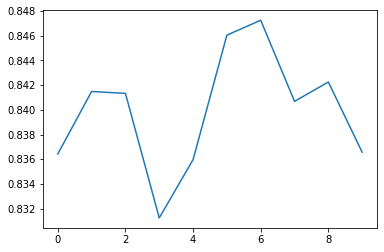

In [ ]:
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostClassifier(learning_rate =0.01, n_estimators =6500, random_state = 720)    

        model.fit(xtrain,ytrain,cat_features = cat_features_index)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [ ]:
importance = np.argmax(predictions, axis=1)

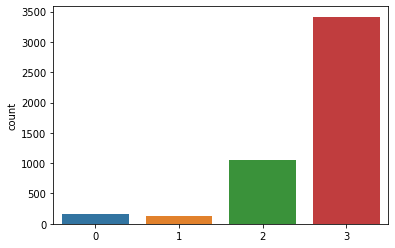

In [ ]:
import seaborn as sns
sns.countplot(importance)

In [ ]:
sub.head()

,appno,importance
0,2052/08,4
1,4728/07,4
2,44135/06,4
3,2607/08,4
4,27001/06,4


In [ ]:
test_new.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,...,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,month,year,week_day
0,1194/04,MS WORD,mk,North Macedonia,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,001-103613,ENG,29,Fith Section Committee,Court,CAMINSKI,794.766724,MKD,33,False,359124,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,February,2011,Thursday
1,53865/11,MS WORD,ua,Ukraine,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,001-158963,ENG,23,Fith Section,Court,KUSHCH,1448.891235,UKR,48,False,435683,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,March,2015,Thursday
2,43838/07,MS WORD,ie,Ireland,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,001-108659,ENG,29,Fith Section Committee,Court,O.,868.238831,IRL,22,False,357179,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,January,2012,Thursday
3,11157/04,MS WORD,ru,Russian Federation,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,001-122260,ENG,4,First Section,Court,ANCHUGOV AND GLADKOV,1024.145508,RUS,38,False,430113,15,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,April,2013,Sunday
4,42443/02,MS WORD,ru,Russian Federation,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,001-91447,ENG,4,First Section,Court,EMINBEYLI,672.862183,RUS,38,False,352583,15,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,February,2009,Thursday


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model = CatBoostClassifier(learning_rate =0.01, n_estimators =6500, random_state = 720)
model.fit(X_train,y_train,cat_features = cat_features_index)

Streaming output truncated to the last 5000 lines.
1500:	learn: 0.3178199	total: 8m	remaining: 26m 38s
1501:	learn: 0.3178101	total: 8m	remaining: 26m 38s
1502:	learn: 0.3177679	total: 8m	remaining: 26m 38s
1503:	learn: 0.3177611	total: 8m 1s	remaining: 26m 37s
1504:	learn: 0.3177297	total: 8m 1s	remaining: 26m 37s
1505:	learn: 0.3177091	total: 8m 1s	remaining: 26m 37s
1506:	learn: 0.3176137	total: 8m 2s	remaining: 26m 37s
1507:	learn: 0.3175518	total: 8m 2s	remaining: 26m 36s
1508:	learn: 0.3174866	total: 8m 2s	remaining: 26m 36s
1509:	learn: 0.3174657	total: 8m 3s	remaining: 26m 36s
1510:	learn: 0.3174344	total: 8m 3s	remaining: 26m 35s
1511:	learn: 0.3174038	total: 8m 3s	remaining: 26m 35s
1512:	learn: 0.3174001	total: 8m 4s	remaining: 26m 35s
1513:	learn: 0.3173742	total: 8m 4s	remaining: 26m 34s
1514:	learn: 0.3173323	total: 8m 4s	remaining: 26m 34s
1515:	learn: 0.3173250	total: 8m 4s	remaining: 26m 34s
1516:	learn: 0.3173195	total: 8m 5s	remaining: 26m 33s
1517:	learn: 0.3173070	

estimators = 1000

In [ ]:
model.score(X_test,y_test)

0.8727477477477478

estimators = 2000

In [ ]:
model.score(X_test,y_test)

0.8834459459459459

estimators = 3000

In [ ]:
model.score(X_test,y_test)

0.8862612612612613

estimators = 4000

In [ ]:
model.score(X_test,y_test)

0.8862612612612613

estimators = 5000

In [ ]:
model.score(X_test,y_test)

0.8885135135135135

estimators = 6500

In [ ]:
model.score(X_train,y_train)

0.9112925936355956

In [ ]:
model.score(X_test,y_test)

0.8896396396396397

predictions

In [ ]:
preds = model.predict(test_data)

In [ ]:
importance = [x[0] for x in preds]

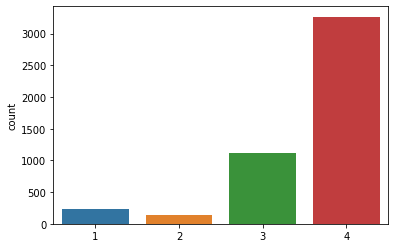

In [ ]:
sns.countplot(importance)

In [ ]:
test['importance'] =importance

In [ ]:
test[sub.columns].head()

,appno,importance
0,1194/04,4
1,53865/11,4
2,43838/07,4
3,11157/04,3
4,42443/02,3


In [ ]:
test[sub.columns].to_csv('hack_catboost_11.csv',index=False)

**after including week and year features score - 83.53530**

**After including estimators as 2000 score improved to 85.44510**

**After including estimators = 3000 score improved to 85.91610**

**After including estimators to 5000 score improved to 86.43730**

## Using TpotClassifier

In [ ]:
train = pd.read_csv("/content/train.csv",parse_dates=['judgementdate','kpdate'])
test = pd.read_csv("/content/test.csv",parse_dates=['judgementdate','kpdate'])
sub = pd.read_csv("/content/sample_submission.csv")

In [ ]:
train['month'] = train['kpdate'].dt.month_name()
train['year'] = train['kpdate'].dt.year
train['week_day'] = train['kpdate'].dt.day_name()
#
test['month'] = test['kpdate'].dt.month_name()
test['year'] = test['kpdate'].dt.year
test['week_day'] = test['kpdate'].dt.day_name()

In [ ]:
train.isnull().sum()[train.isnull().sum() > 0 ]/len(train)

decisiondate        0.923857
introductiondate    0.923857
issue.0             0.746790
issue.1             0.866524
issue.10            0.997635
issue.11            0.998085
issue.12            0.998310
issue.13            0.998648
issue.14            0.998874
issue.15            0.999212
issue.16            0.999549
issue.17            0.999662
issue.18            0.999775
issue.19            0.999775
issue.2             0.928024
issue.20            0.999775
issue.21            0.999775
issue.22            0.999775
issue.23            0.999775
issue.24            0.999887
issue.25            0.999887
issue.26            0.999887
issue.3             0.958324
issue.4             0.976346
issue.5             0.986371
issue.6             0.991327
issue.7             0.994030
issue.8             0.996508
issue.9             0.997184
parties.1           0.000451
parties.2           0.999887
respondent.1        0.995832
respondent.2        0.999887
respondent.3        0.999887
respondent.4  

In [ ]:
drop_cols = train.isnull().sum()[train.isnull().sum() > 0 ].index.tolist()

In [ ]:
train_new = train.drop(drop_cols,axis=1)
test_new = test.drop(drop_cols,axis=1)

In [ ]:
cat_cols = [col for col in train_new.columns if train_new[col].dtypes == 'O']

In [ ]:
cat_cols

['appno',
 'application',
 'country.alpha2',
 'country.name',
 'docname',
 'doctypebranch',
 'ecli',
 'itemid',
 'languageisocode',
 'originatingbody_name',
 'originatingbody_type',
 'parties.0',
 'respondent.0',
 'month',
 'week_day']

In [ ]:
cat_cols_req = []
for col in cat_cols:
  print(f'{col} : {train_new[col].nunique()} {train_new[col].nunique()/len(train_new[col])}')
  if (train_new[col].nunique()/len(train_new[col]) <= 0.40) and train_new[col].nunique() !=1:
    cat_cols_req.append(col)

appno : 8799 0.9911015994593377
application : 1 0.00011263798152737103
country.alpha2 : 46 0.0051813471502590676
country.name : 46 0.0051813471502590676
docname : 8682 0.9779229556206352
doctypebranch : 3 0.00033791394458211306
ecli : 8878 1.0
itemid : 8878 1.0
languageisocode : 1 0.00011263798152737103
originatingbody_name : 13 0.0014642937598558234
originatingbody_type : 1 0.00011263798152737103
parties.0 : 8361 0.9417661635503491
respondent.0 : 46 0.0051813471502590676
month : 12 0.0013516557783284523
week_day : 7 0.0007884658706915972


In [ ]:
cat_cols_req

['country.alpha2',
 'country.name',
 'doctypebranch',
 'originatingbody_name',
 'respondent.0',
 'month',
 'week_day']

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
ss = StandardScaler()
lb = LabelEncoder()

In [ ]:
for col in cat_cols_req:
  train_new[col] = lb.fit_transform(train_new[col])
  test_new[col] = lb.transform(test_new[col])

In [ ]:
train_new.drop(['country.name'],axis=1,inplace=True)
test_new.drop(['country.name'],axis=1,inplace=True)

In [ ]:
train_new.year.unique()

array([2009, 2018, 2012, 2014, 2002, 2006, 2007, 2001, 2008, 1994, 2016,
       2013, 2017, 2019, 2003, 2004, 2010, 2005, 2020, 2011, 2015, 2000,
       1992, 1984, 1996, 1997, 1989, 1991, 1995, 1985, 1993, 1983, 1986,
       1999, 1998, 1987, 1990, 1988, 1968, 1975, 1969, 1982, 1974, 1976,
       1980, 1981, 1979, 1971, 1978])

In [ ]:
test_new.year.unique()

array([2011, 2015, 2012, 2013, 2009, 2014, 2018, 2019, 2010, 2017, 2006,
       2007, 2008, 2016, 1996, 2004, 2003, 2020, 1990, 2005, 2002, 1994,
       2001, 2000, 1998, 1999, 1986, 1985, 1979, 1997, 1991, 1989, 1988,
       1982, 1980, 1995, 1984, 1993, 1968, 1983, 1978, 1992, 1987, 1976,
       1981, 1961, 1975, 1972, 1970])

In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Columns: 295 entries, appno to week_day
dtypes: bool(1), datetime64[ns](2), float64(1), int64(283), object(8)
memory usage: 19.9+ MB


In [ ]:
new_cat_cols = [ col for col in train_new.columns if train_new[col].dtypes =='O']
new_cat_cols 

['appno',
 'application',
 'docname',
 'ecli',
 'itemid',
 'languageisocode',
 'originatingbody_type',
 'parties.0']

In [ ]:
train_new.drop(new_cat_cols,axis=1,inplace=True )
test_new.drop(new_cat_cols,axis=1,inplace=True )

In [ ]:
train_new = train_new.sort_values(by='kpdate')
test_new = test_new.sort_values(by='kpdate')

In [ ]:
train_new.drop(['kpdate','judgementdate'],axis=1,inplace=True)
test_new.drop(['kpdate','judgementdate'],axis=1,inplace=True)

In [ ]:
train_new.drop(['year'],axis=1,inplace=True)
test_new.drop(['year'],axis=1,inplace=True)

In [ ]:
train_new.head()

,country.alpha2,doctypebranch,originatingbody,originatingbody_name,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,...,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance,month,week_day
6643,11,0,9,0,171.353943,11,18,True,447601,14,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,2,6,4
1509,6,0,15,8,171.557037,5,6,True,447596,14,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1,0,0,0,0,2,5,5
1765,3,0,9,0,175.438538,3,4,True,447614,14,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,10,2
8771,3,0,9,0,175.442184,3,4,True,447617,14,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,2,10,2
7569,6,0,15,8,180.502228,5,6,True,447631,14,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,-1,0,-1,0,0,-1,0,0,0,0,0,0,2,6,0


In [ ]:
test_new.head()

,country.alpha2,doctypebranch,originatingbody,originatingbody_name,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,...,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,month,week_day
3852,22,0,9,0,153.414932,22,22,True,447582,14,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,4,2
1322,3,0,9,0,171.350479,3,4,True,447607,14,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,4
4301,6,0,9,0,176.009018,5,6,False,447620,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,4,2
4271,6,0,15,8,182.908981,5,6,True,320144,12,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,5
4011,17,0,15,8,193.431976,17,49,True,447639,15,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0


In [ ]:
X = train_new.drop('importance',axis=1)
Y = train_new['importance']

In [ ]:
test_new = test_new[X.columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
X_scaled = ss.fit_transform(X)

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(verbosity=2,max_time_mins=20)
tpot.fit(X_scaled,Y)


22.05 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(Normalizer(input_matrix, norm=max), bootstrap=True, criterion=entropy, max_features=0.55, min_samples_leaf=11, min_samples_split=13, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=None, max_eval_time_mins=5, max_time_mins=20,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='max')),
                ('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                      class_weight=None, criterion='entropy',
                                      max_depth=None, max_features=0.55,
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=11, min_samples_split=13,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
tpot.score(X_test_scaled,y_test)

0.8907657657657657

In [ ]:
test_data = ss.transform(test_new)

In [ ]:
y_pred = tpot.predict(test_data)

In [ ]:
y_pred

array([2, 4, 4, ..., 3, 3, 4])

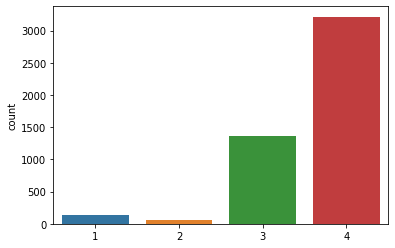

In [ ]:
sns.countplot(y_pred)

In [ ]:
test['importance'] = y_pred

In [ ]:
test[sub.columns].head()

,appno,importance
0,1194/04,2
1,53865/11,4
2,43838/07,4
3,11157/04,2
4,42443/02,3


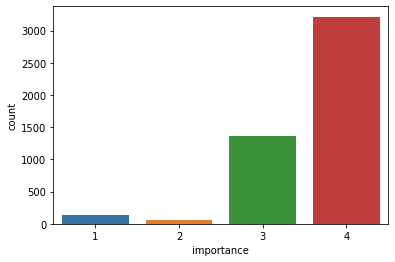

In [ ]:
sns.countplot(test['importance'])

In [ ]:
test[sub.columns].to_csv('tpot_classifier2.csv',index=False)